# Arbaro demo scene

Notebook: Hannah Weiser, 2025

This demo showcases two highly detailed tree models scanned from two terrestrial laser scanning (TLS) scanning positions.

In [1]:
import helios
from helios.platforms import DynamicPlatformSettings  # these should not have to be imported extra?
from helios.settings import OutputFormat, LogVerbosity # these should not have to be imported extra?
import numpy as np

## Creating the virtual scene

In [2]:
from pathlib import Path
print(Path.cwd())

D:\Software\_helios_versions\helios_dev\example_notebooks


In [3]:
# load objs and create transformations
groundplane = helios.ScenePart.from_obj("../data/sceneparts/basic/groundplane/groundplane.obj").scale(100)  # scale groundplane by 100
tree1 = helios.ScenePart.from_obj("../data/sceneparts/arbaro/black_tupelo_low.obj", up_axis="y")  # 3D models exported from Blender often have the Y-axis as "up-axis"
tree2 = helios.ScenePart.from_obj("../data/sceneparts/arbaro/sassafras_low.obj", up_axis="y")
# Trees should both be scaled down by half and translated
tree1 = tree1.scale(0.5).translate([0.0, 15.0, 0.0])
tree2 = tree2.scale(0.5).translate([-10.0, 15.0, 0.0])
#create scene
scene = helios.StaticScene(scene_parts=[groundplane, tree1, tree2])

## Platform and Scanner

In [4]:
from helios.scanner import riegl_vz_400
from helios.platforms import tripod

scanner = riegl_vz_400()
platform = tripod()

## Scanner Settings

In [5]:
# these scanner settings will be shared between all legs
scanner_settings = helios.ScannerSettings(pulse_frequency=100_000,  # Hz
                                          scan_frequency=120,  # Hz
                                          min_vertical_angle=-40,  # °
                                          max_vertical_angle=60,
                                          head_rotation=10  # °/s
                                         )

## Scan Positions

In [6]:
survey = helios.Survey(scanner=scanner, platform=platform, scene=scene)
# first scan position
survey.add_leg(scanner_settings=scanner_settings,
               x=1.0,
               y=25.5,
               z=1.5,
               force_on_ground=True,  # this works because of the specification in the groundplane.mtl file
               rotation_start_angle=100,  # °
               rotation_stop_angle=225
              )
# second scan position
#survey.add_leg(scanner_settings=scanner_settings,
#               x=-4.0,
#               y=-2.5,
#               z=1.5,
#               force_on_ground=True,
#               rotation_start_angle=-45,
#               rotation_stop_angle=45
#              )

## Executing the survey

In [7]:
points, trajectories = survey.run(verbosity=LogVerbosity.VERBOSE, format=OutputFormat.NPY)

In [8]:
points

array([(0, 0, [ 8.50341054e+00,  3.85241757e+01,  5.06683360e-03], [ 0.48828776,  0.847554  , -0.20791169], [ 1.       , 25.5      , -3.7726975], 15.36677978, 9.41481085e+05, 0., 1, 1,      97, 0, 327101.00791),
       (0, 0, [ 5.44629974e+00,  3.32126999e+01, -9.01905066e-04], [ 0.46998561,  0.81525273, -0.33834378], [ 1.       , 25.5      , -3.7726975],  9.46050183, 4.08927639e+06, 0., 1, 1,      70, 0, 327101.00764),
       (0, 0, [ 8.69878949e+00,  3.88636317e+01,  2.75475899e-03], [ 0.48879441,  0.84845396, -0.20299238], [ 1.       , 25.5      , -3.7726975], 15.75056787, 8.42282091e+05, 0., 1, 1,      98, 0, 327101.00792),
       ...,
       (0, 0, [ 6.98932957e+01,  5.09796920e+01, -1.93628519e-03], [ 0.93701998,  0.34655013, -0.04354964], [ 1.       , 25.5      , -3.7726975], 73.52382811, 7.40113282e+03, 0., 1, 1, 1989081, 0, 327220.3453 ),
       (0, 0, [ 7.88618795e+01,  5.42975854e+01, -7.88579695e-04], [ 0.93720982,  0.3466315 , -0.03852733], [ 1.       , 25.5      , -3.7726

In [9]:
points["gps_time"]

array([327101.00791, 327101.00764, 327101.00792, ..., 327220.3453 ,
       327220.34531, 327220.34532], shape=(1100382,))

In [10]:
trajectories

array([(327101.  , [ 1. , 25.5,  1.5], -0., 0., -0.),
       (327101.01, [ 1. , 25.5,  1.5], -0., 0., -0.),
       (327101.02, [ 1. , 25.5,  1.5], -0., 0., -0.), ...,
       (327220.34, [ 1. , 25.5,  1.5], -0., 0., -0.),
       (327220.35, [ 1. , 25.5,  1.5], -0., 0., -0.),
       (327220.36, [ 1. , 25.5,  1.5], -0., 0., -0.)],
      shape=(11937,), dtype=[('gps_time', '<f8'), ('position', '<f8', (3,)), ('roll', '<f8'), ('pitch', '<f8'), ('yaw', '<f8')])

## Visualizing the result

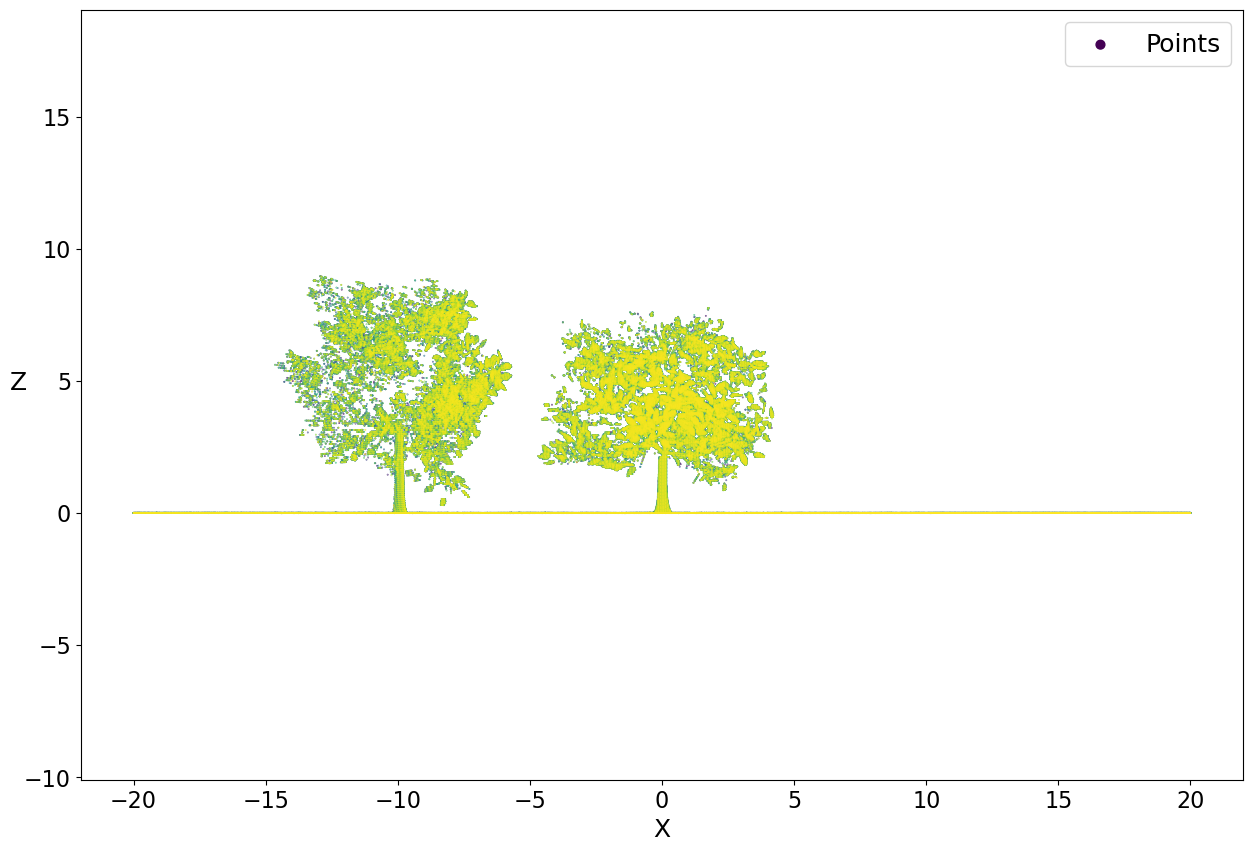

In [11]:
import matplotlib.pyplot as plt

pos = points["position"]

# discard points outside of [-20, -20] to [20, 20] (x, y)
points_sub = points[
    (pos[:, 0] > -20) & (pos[:, 1] > -20) & (pos[:, 0] < 20) & (pos[:, 1] < 20)
]
pos = points_sub["position"]

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(
   pos[:, 0], pos[:, 2], s=0.1, label="Points", c=points_sub["gps_time"]
)
plt.axis("equal")
ax.tick_params(labelsize=16)
plt.xlabel("X", fontsize=18)
plt.ylabel("Z", fontsize=18, rotation=0)
plt.legend(fontsize=18, markerscale=20)
plt.show()

In [12]:
survey.run(verbosity=LogVerbosity.VERBOSE, format=OutputFormat.LAZ)

WindowsPath('D:/Software/_helios_versions/helios_dev/example_notebooks/output/2025-10-22_20-52-15')